# Piechart Figures
- The first figure shows the breakdown of each module's synaptic connection location on the oviIN neuron body. This gives us an idea of how the modularity sorts the pre-synaptic connectome
- The second figure shows where all the synapses in the pre-synaptic connectome are made, broken down by the module that the pre-synaptic neuron is sorted into at 0.0 resolution

This file is easily adjusted to any dataset in the v1.2.1.

Written by Rhessa Weber Langstaff

In [85]:
# Imports
import os
import time
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from util import *

plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["font.sans-serif"] = "Helvetica"

from neuprint import Client
from neuprint import fetch_synapse_connections, NeuronCriteria as NC, fetch_all_rois, fetch_primary_rois, fetch_adjacencies
from neuprint import fetch_roi_hierarchy, fetch_mean_synapses, SynapseCriteria as SC, fetch_simple_connections

hemibrain_version = "v1.2.1"

auth_token_file = open("flybrain.auth.txt", 'r')
auth_token = next(auth_token_file).strip()
try:
    np_client = Client('neuprint.janelia.org', dataset='hemibrain:' + hemibrain_version, token=auth_token)
    log_msg("neuprint Client set up as `np_Client`, version", np_client.fetch_version())
except:
    np_client = None
    log_msg("neuprint Client set up failed!")

2024 09 11 15:50:23  neuprint Client set up as `np_Client`, version 0.1.0


In [86]:
# Read in dataframe with super, l1, l2, l3, and l4. Created this file by following the output 
# of the fetch_roi_hierarchy function.
# Super column is larger functional groups that we decided using Nomenclature paper (link)
roi_df = pd.read_excel('all_roi_df.xlsx')
roi_df

,Super,Super_split,L1,L2,L3,L4,Color,Color2
0,AL,AL(L),AL(L),NaN,NaN,NaN,cadetblue,NaN
1,AL,NaN,NaN,AL-D(L),NaN,NaN,NaN,cadetblue
2,AL,NaN,NaN,AL-DA2(L),NaN,NaN,NaN,cadetblue
3,AL,NaN,NaN,AL-DA3(L),NaN,NaN,NaN,cadetblue
4,AL,NaN,NaN,AL-DA4m(L),NaN,NaN,NaN,cadetblue
...,...,...,...,...,...,...,...,...
225,VMNP,NaN,NaN,VES(L),NaN,NaN,NaN,firebrick
226,VMNP,NaN,NaN,VES(R),NaN,NaN,NaN,firebrick
227,AL,AL(L),mALT(L),mALT(L),NaN,NaN,cadetblue,NaN
228,AL,AL(R),mALT(R),mALT(R),NaN,NaN,cadetblue,NaN


In [87]:
# Different levels of ROI can be accessed using the dropna() function
roi_super = roi_df['Super'].dropna()
roi_super_split = roi_df['Super_split'].dropna()
roi_l1 = roi_df['L1'].dropna()

In [88]:
# Adjust dataset here
direct = "oviIN_sep10/preprocessed_inputs-" + hemibrain_version
filename = "preprocessed_nodes.csv"

log_msg("Loading node dataframe")
ins_r = pd.read_csv(os.path.join(direct, filename))
log_msg("Done!")
ins_r.head()
ins_r

2024 09 11 15:50:23  Loading node dataframe
2024 09 11 15:50:23  Done!


,id,key,0.05,0.1,0.5,0.0,instance,celltype,pre,post,...,status,cropped,statusLabel,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois
0,234630133,1,1,1,1,1,SMP184(PDL05)_L,SMP184,1075,2470,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 153, 'post': 1758, 'downstr...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G..."
1,263674097,2,2,2,2,2,LHPD2a5_a_R,LHPD2a5_a,133,547,...,Traced,False,Roughly traced,PDL06,268.5,"[5386, 20096, 4080]","{'SNP(R)': {'pre': 121, 'post': 330, 'downstre...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LH(R)'...","['INP', 'LH(R)', 'SCL(R)', 'SIP(R)', 'SMP(R)',..."
2,266187480,3,3,3,3,3,SMP349_R,SMP349,190,854,...,Traced,False,Traced,PDM07,238.5,"[18808, 27714, 4256]","{'SNP(R)': {'pre': 190, 'post': 854, 'downstre...",NaN,"['SIP(R)', 'SLP(R)', 'SMP(R)', 'SNP(R)']","['SIP(R)', 'SLP(R)', 'SMP(R)', 'SNP(R)']"
3,266187559,4,3,3,4,3,SLP399_R,SLP399,216,749,...,Traced,False,Roughly traced,PDM07,290.5,"[17838, 26568, 3924]","{'SNP(R)': {'pre': 216, 'post': 744, 'downstre...",NaN,"['LH(R)', 'SLP(R)', 'SMP(R)', 'SNP(R)']","['SLP(R)', 'SMP(R)', 'SNP(R)']"
4,267214250,5,3,3,5,3,pC1b_R,pC1b,816,3187,...,Traced,False,Traced,PDM09,446.5,"[18931, 10896, 14728]","{'SNP(R)': {'pre': 547, 'post': 2474, 'downstr...",NaN,"['AOTU(R)', 'AVLP(R)', 'ICL(R)', 'INP', 'SCL(R...","['AVLP(R)', 'INP', 'SCL(R)', 'SIP(R)', 'SLP(R)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,5901231318,2507,6,6,235,5,NaN,NaN,55,66,...,Traced,True,Leaves,NaN,NaN,NaN,"{'SNP(L)': {'pre': 55, 'post': 66, 'downstream...",NaN,"['SMP(L)', 'SNP(L)']","['SMP(L)', 'SNP(L)']"
2507,5901232053,2508,4,4,15,4,SMP272(PDL21)_L,SMP272,1064,1640,...,Traced,False,Roughly traced,NaN,NaN,NaN,"{'SNP(L)': {'pre': 464, 'post': 967, 'downstre...",NaN,"['CRE(-RUB)(L)', 'CRE(L)', 'INP', 'LAL(L)', 'L...","['CRE(-RUB)(L)', 'CRE(L)', 'INP', 'SCL(L)', 'S..."
2508,6400000773,2509,3,3,31,3,SMP411_R,SMP411,182,522,...,Traced,False,Roughly traced,PDM09,321.5,"[22433, 11755, 18464]","{'SNP(R)': {'pre': 180, 'post': 467, 'downstre...",NaN,"['INP', 'LH(R)', 'MB(+ACA)(R)', 'PLP(R)', 'SCL...","['MB(+ACA)(R)', 'PLP(R)', 'SIP(R)', 'SLP(R)', ..."
2509,7112622044,2510,7,7,77,6,LAL137(PVL05)_L,LAL137,1376,2087,...,Traced,False,Roughly traced,NaN,NaN,NaN,"{'SNP(R)': {'pre': 304, 'post': 130, 'downstre...",VeLC-(LC)(c)Sm(b),"['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'...","['CRE(-ROB,-RUB)(R)', 'CRE(-RUB)(L)', 'CRE(L)'..."


In [89]:
# Fetch synaptic connections to the oviINr, can take around 1 minute
ids = ins_r["id"]
roi_info = fetch_synapse_connections(NC(bodyId=ids), NC(bodyId=423101189), batch_size=1000)
roi_info

  0%|          | 0/21608 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

,bodyId_pre,bodyId_post,roi_pre,roi_post,x_pre,y_pre,z_pre,x_post,y_post,z_post,confidence_pre,confidence_post
0,699363923,423101189,SMP(R),SMP(R),18710,34066,11978,18714,34056,11998,0.836,0.462087
1,699363923,423101189,SMP(R),SMP(R),22445,25222,10972,22414,25228,10973,0.994,0.456265
2,699363923,423101189,SMP(R),SMP(R),22609,32249,11168,22598,32226,11165,0.996,0.895489
3,699358695,423101189,SMP(R),SMP(R),23605,19671,12076,23607,19654,12075,0.811,0.844000
4,699358695,423101189,SMP(R),SMP(R),21837,24629,12812,21852,24648,12828,0.941,0.844886
...,...,...,...,...,...,...,...,...,...,...,...,...
21603,1875284107,423101189,VES(R),VES(R),22272,23848,29541,22261,23861,29557,0.933,0.854542
21604,1844249219,423101189,IB,IB,25286,16199,21709,25311,16190,21743,0.752,0.604000
21605,1844249219,423101189,VES(R),VES(R),22038,21037,28943,22057,21047,28964,0.937,0.425953
21606,1848000962,423101189,VES(R),VES(R),23349,21550,26101,23335,21569,26106,0.817,0.993132


## Synapses on oviIN breakdown

In [90]:
# Drop all unnecessary columns
roi_info_small = roi_info[['bodyId_pre', 'roi_post']]

# Collapse on roi_post and count the number of synapses in a new column called weight
roi_info_grouped = roi_info_small.groupby(['roi_post', 'bodyId_pre']).size().reset_index(name='weight')

# rename roi_post to roi
roi_info_grouped = roi_info_grouped.rename(columns = {'roi_post':'roi', 'bodyId_pre':'bodyId'})

In [91]:
# change weight to count
roi_info_grouped = roi_info_grouped.rename(columns = {'weight':'count'})

ins_r_e = pd.merge(ins_r, roi_info_grouped, left_on='id', right_on='bodyId', how='inner')


In [92]:
# Parameters needed for plotting
clusters = ins_r_e["0.0"].unique()
super_title = 'OviINr Input Connectome'
label_threshold = 1
color_dict = {'SNP': 'cornflowerblue', 'VMNP': 'firebrick', 'LX': 'blueviolet', 'INP': 'green'}
roi_super_dict = {'SMP(R)': 'SNP', 'SMP(L)': 'SNP', 'SIP(R)': 'SNP', 'SIP(L)': 'SNP', 'VES(R)': 'VMNP', 'LAL(R)': 'LX', 'IB': 'INP', 'CRE(R)': 'INP', 'CRE(L)': 'INP', 'ATL(R)': 'INP', 'ATL(L)': 'AL', 'VES(L)': 'VMNP', 'GOR(R)': 'VMNP', 'GOR(L)': 'VMNP', 'SPS(R)': 'VMNP', 'SPS(L)': 'VMNP', 'FLA(R)': 'PENP', 'FLA(L)': 'PENP', 'PENP': 'PENP', 'AL': 'AL', 'PENP': 'PENP'}
weight_threshold = 1
plot_labels = ['a.', 'b.', 'c.', 'd.', 'e.', 'f.', 'g.']
less_clusters = True

In [93]:
len(clusters)

7

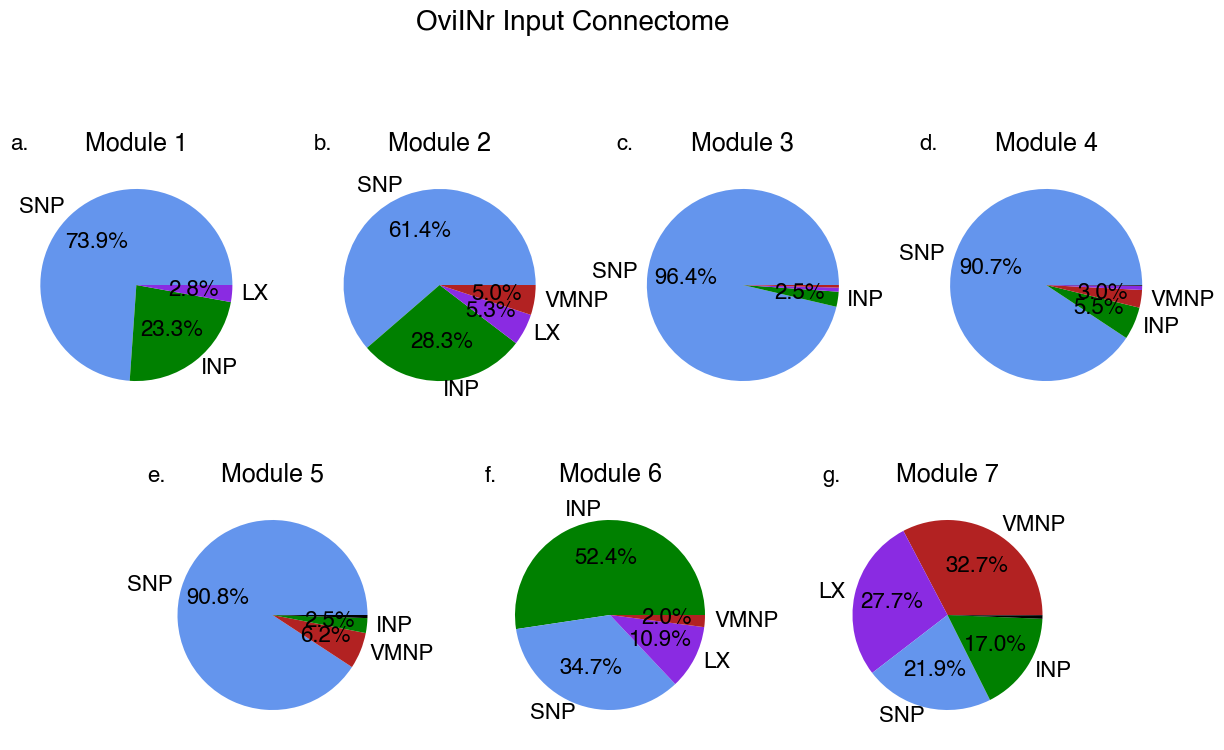

In [94]:
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
plt.suptitle(super_title, fontsize=20)
for i in clusters: 
        roi_grouped = ins_r_e[ins_r_e['0.0'] == i].groupby('roi', as_index=False).agg({'count': 'sum'})
        
        # Assign preferred roi
        roi_grouped['super'] = roi_grouped['roi'].map(roi_super_dict).fillna(roi_grouped['roi'])
        roi_grouped = roi_grouped.drop(columns=['roi'])

        # Add up total weight for the super roi
        roi_grouped = roi_grouped.groupby('super', as_index=False).agg({'count':'sum'})  
        roi_total = roi_grouped[roi_grouped['count'] > 1].sort_values(by='count', ascending=False)

        # Assign color
        roi_total['color'] = roi_total['super'].map(color_dict).fillna('black')
        
        # Filter roi_total by weight_threshold and sort by total in descending order (might not need to do this but just in case)
        data = roi_total[roi_total['count'] > weight_threshold].sort_values(by='count', ascending=False)
    
        # plot pie chart by value counts without none
        w, text, at = ax[int((i-1)/int(len(clusters)/1.5)), (i-1)%int(len(clusters)/1.5)].pie(data['count'], labels = data['super'], colors = data['color'], autopct='%.1f%%',textprops={'fontsize': 16},radius=0.95, startangle=0)
        for t, x in enumerate(at):
            # Convert third part of x from string to float
            z = float(x.get_text().split()[0][:-1])
            if z <= label_threshold:
                    text[t].set_text('')
                    at[t].set_text('')
        ax[int((i-1)/int(len(clusters)/1.5)), (i-1)%int(len(clusters)/1.5)].set_title('Module ' + str(i), fontsize=18)
        ax[int((i-1)/int(len(clusters)/1.5)), (i-1)%int(len(clusters)/1.5)].set_title(plot_labels[i-1], fontweight='bold', loc='left', fontsize=16)

# Adjust subplot dimensions if less_clusters is True (for connectomes with odd number of clusters)
if less_clusters:
    fig.delaxes(ax[1, 3])
    # move bottom 3 axes to the middle
    ax[1, 0].set_position([0.05, 0.25, 0.5, 0.25])
    ax[1, 1].set_position([0.3, 0.25, 0.45, 0.25])
    ax[1, 2].set_position([0.55, 0.25, 0.4, 0.25])


## Portionality Plot

In [95]:
# Pull presynpatic neurons outputs and input connections
ids = ins_r["id"]
_, roi_info_p = fetch_adjacencies(NC(bodyId=ids), None)

_, roi_info_in_p = fetch_adjacencies(None, NC(bodyId=ids))

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [96]:
# Combine input and output roi info
roi_out = roi_info_p[['bodyId_pre', 'roi', 'weight']]
roi_in = roi_info_in_p[['bodyId_post', 'roi', 'weight']]

roi_out = roi_out.rename(columns = {'bodyId_pre':'bodyId'})
roi_in = roi_in.rename(columns = {'bodyId_post':'bodyId'})

roi_both = pd.concat([roi_out, roi_in], axis=0)
roi_both

,bodyId,roi,weight
0,234630133,SMP(L),2
1,234630133,SMP(L),1
2,234630133,SMP(L),1
3,234630133,SMP(L),1
4,234630133,SMP(R),4
...,...,...,...
883018,484890037,SMP(L),1
883019,485628489,SMP(L),1
883020,574511458,SMP(L),1
883021,733182574,SMP(L),2


In [97]:
# Drop all unnecessary columns
grouped_p = roi_both[['bodyId', 'roi', 'weight']]

# For each bodyID i want to get a fraction of how many synapses (weight) were made in an roi
# over the total number of synapses made by that bodyID and put that portionality in a new column

# I will first create a column that will contain the total number of synapses made by a bodyID
grouped_p['total'] = grouped_p.groupby('bodyId')['weight'].transform('sum')

# I will then create a new column that will contain the fraction of synapses made in an roi
# over the total number of synapses made by that bodyID
grouped_p['fraction'] = grouped_p['weight'] / grouped_p['total']


# I will drop the weight and total columns as they are no longer needed
grouped_p = grouped_p.drop(columns=['weight', 'total'])
grouped_p

,bodyId,roi,fraction
0,234630133,SMP(L),0.000378
1,234630133,SMP(L),0.000189
2,234630133,SMP(L),0.000189
3,234630133,SMP(L),0.000189
4,234630133,SMP(R),0.000756
...,...,...,...
883018,484890037,SMP(L),0.000487
883019,485628489,SMP(L),0.002096
883020,574511458,SMP(L),0.000481
883021,733182574,SMP(L),0.000582


In [98]:
# Input modularity data for oviINr merged with the roi portionality data
in_r_p = pd.merge(ins_r, grouped_p, left_on='id', right_on='bodyId', how='inner')
in_r_p

,id,key,0.05,0.1,0.5,0.0,instance,celltype,pre,post,...,cellBodyFiber,somaRadius,somaLocation,roiInfo,notes,inputRois,outputRois,bodyId,roi,fraction
0,234630133,1,1,1,1,1,SMP184(PDL05)_L,SMP184,1075,2470,...,NaN,NaN,NaN,"{'SNP(L)': {'pre': 153, 'post': 1758, 'downstr...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...",234630133,SMP(L),0.000378
1,234630133,1,1,1,1,1,SMP184(PDL05)_L,SMP184,1075,2470,...,NaN,NaN,NaN,"{'SNP(L)': {'pre': 153, 'post': 1758, 'downstr...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...",234630133,SMP(L),0.000189
2,234630133,1,1,1,1,1,SMP184(PDL05)_L,SMP184,1075,2470,...,NaN,NaN,NaN,"{'SNP(L)': {'pre': 153, 'post': 1758, 'downstr...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...",234630133,SMP(L),0.000189
3,234630133,1,1,1,1,1,SMP184(PDL05)_L,SMP184,1075,2470,...,NaN,NaN,NaN,"{'SNP(L)': {'pre': 153, 'post': 1758, 'downstr...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...",234630133,SMP(L),0.000189
4,234630133,1,1,1,1,1,SMP184(PDL05)_L,SMP184,1075,2470,...,NaN,NaN,NaN,"{'SNP(L)': {'pre': 153, 'post': 1758, 'downstr...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'LAL(-G...",234630133,SMP(R),0.000756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1783111,7112624972,2511,9,28,531,2,NaN,NaN,4,42,...,NaN,NaN,NaN,"{'SNP(R)': {'pre': 1, 'post': 6, 'downstream':...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'SMP(R)...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'SMP(R)...",7112624972,CRE(R),0.022222
1783112,7112624972,2511,9,28,531,2,NaN,NaN,4,42,...,NaN,NaN,NaN,"{'SNP(R)': {'pre': 1, 'post': 6, 'downstream':...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'SMP(R)...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'SMP(R)...",7112624972,CRE(R),0.044444
1783113,7112624972,2511,9,28,531,2,NaN,NaN,4,42,...,NaN,NaN,NaN,"{'SNP(R)': {'pre': 1, 'post': 6, 'downstream':...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'SMP(R)...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'SMP(R)...",7112624972,CRE(R),0.044444
1783114,7112624972,2511,9,28,531,2,NaN,NaN,4,42,...,NaN,NaN,NaN,"{'SNP(R)': {'pre': 1, 'post': 6, 'downstream':...",NaN,"['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'SMP(R)...","['CRE(-ROB,-RUB)(R)', 'CRE(R)', 'INP', 'SMP(R)...",7112624972,CRE(R),0.066667


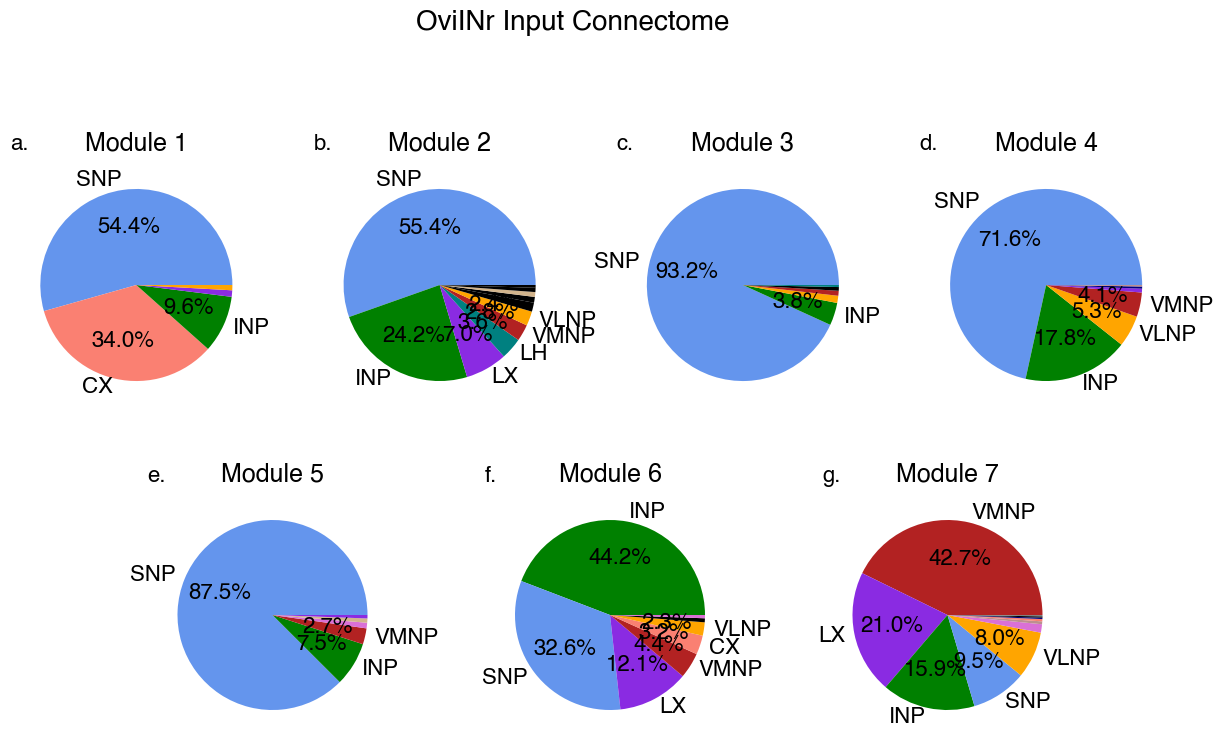

In [99]:
# Set color maps
color_dict = roi_df.set_index('Super')['Color'].dropna().to_dict()
roi_super_dict = roi_df.set_index('L2')['Super'].dropna().to_dict()

# set label-threshold
label_threshold = 1.5

# Plot
fig, ax = plt.subplots(2, 4, figsize=(15, 10))
plt.suptitle(super_title, fontsize=20)
for i in clusters: 
        roi_grouped = in_r_p[in_r_p['0.0'] == i].groupby('roi', as_index=False).agg({'fraction': 'sum'})

        # Assign preferred roi
        roi_grouped['super'] = roi_grouped['roi'].map(roi_super_dict).fillna(roi_grouped['roi'])
        roi_grouped = roi_grouped.drop(columns=['roi'])

        # Add up total weight for the super roi
        roi_grouped = roi_grouped.groupby('super', as_index=False).agg({'fraction':'sum'})  
        roi_total = roi_grouped[roi_grouped['fraction'] > 1].sort_values(by='fraction', ascending=False)

        # Assign color
        roi_total['color'] = roi_total['super'].map(color_dict).fillna('black')
        
        # Filter roi_total by weight_threshold and sort by total in descending order (might not need to do this but just in case)
        data = roi_total[roi_total['fraction'] > weight_threshold].sort_values(by='fraction', ascending=False)
    
        # plot pie chart by value counts without none
        w, text, at = ax[int((i-1)/int(len(clusters)/1.5)), (i-1)%int(len(clusters)/1.5)].pie(data['fraction'], labels = data['super'], colors = data['color'], autopct='%.1f%%',textprops={'fontsize': 16},radius=0.95, startangle=0)
        for t, x in enumerate(at):
            # Convert third part of x from string to float
            z = float(x.get_text().split()[0][:-1])
            if z <= label_threshold:
                    text[t].set_text('')
                    at[t].set_text('')
        ax[int((i-1)/int(len(clusters)/1.5)), (i-1)%int(len(clusters)/1.5)].set_title('Module ' + str(i), fontsize=18)
        ax[int((i-1)/int(len(clusters)/1.5)), (i-1)%int(len(clusters)/1.5)].set_title(plot_labels[i-1], fontweight='bold', loc='left', fontsize=16)

# Adjust subplot dimensions if less_clusters is True (for connectomes with odd number of clusters)
if less_clusters:
    fig.delaxes(ax[1, 3])
    # move bottom 3 axes to the middle
    ax[1, 0].set_position([0.05, 0.25, 0.5, 0.25])
    ax[1, 1].set_position([0.3, 0.25, 0.45, 0.25])
    ax[1, 2].set_position([0.55, 0.25, 0.4, 0.25])